# VERIFICA PANDAS 
## BARUFFOLO NOEMI 5^AROB
### 28/01/2025

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dati = pd.read_csv("./traffic_accidents.csv")
dati

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6


In [3]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [4]:
# mostrare i tipi di incidente
tipiIncidente = dati["crash_type"] # o "first_crash_type"
tipiIncidente

0                   NO INJURY / DRIVE AWAY
1                   NO INJURY / DRIVE AWAY
2                   NO INJURY / DRIVE AWAY
3         INJURY AND / OR TOW DUE TO CRASH
4                   NO INJURY / DRIVE AWAY
                        ...               
209301              NO INJURY / DRIVE AWAY
209302              NO INJURY / DRIVE AWAY
209303    INJURY AND / OR TOW DUE TO CRASH
209304    INJURY AND / OR TOW DUE TO CRASH
209305              NO INJURY / DRIVE AWAY
Name: crash_type, Length: 209306, dtype: object

In [28]:
# contare gli incidenti raggruppandoli per condizione meteo
numIncidentiMeteo = dati[[ "weather_condition"]].groupby("weather_condition").value_counts()
numIncidentiMeteo

weather_condition
BLOWING SAND, SOIL, DIRT         1
BLOWING SNOW                   127
CLEAR                       164700
CLOUDY/OVERCAST               7533
FOG/SMOKE/HAZE                 360
FREEZING RAIN/DRIZZLE          510
OTHER                          627
RAIN                         21703
SEVERE CROSS WIND GATE          32
SLEET/HAIL                     308
SNOW                          6871
UNKNOWN                       6534
Name: count, dtype: int64

In [11]:
# calcolare il numero di incidenti per ora
numIncidentiPerOra = dati[["crash_hour", "crash_date"]].groupby("crash_hour").sum()
numIncidentiPerOra

,crash_date
crash_hour,
0,08/13/2023 12:11:00 AM09/06/2023 12:59:00 AM05...
1,07/01/2022 01:00:00 AM08/13/2018 01:45:00 AM07...
2,08/06/2023 02:30:00 AM08/13/2023 02:28:00 AM10...
3,10/25/2015 03:01:00 AM10/23/2016 03:00:00 AM06...
4,03/02/2020 04:35:00 AM10/09/2018 04:00:00 AM11...
5,09/25/2023 05:46:00 AM09/27/2023 05:48:00 AM05...
6,09/12/2023 06:34:00 AM08/21/2023 06:39:00 AM08...
7,08/09/2023 07:00:00 AM07/26/2023 07:43:00 AM09...
8,09/06/2023 08:59:00 AM09/18/2023 08:09:00 AM06...


In [23]:
# calcolare il numero di incidenti per anno e mese

dati['crash_date'] = pd.to_datetime(dati['crash_date'])
dati['year'] = dati['crash_date'].dt.year
dati['month'] = dati['crash_date'].dt.month

numIncidentiPerAnnoMese = dati.groupby(['year', 'month']).size()
numIncidentiPerAnnoMese

year  month
2013  3           1
      6           1
2015  2           1
      5           1
      8          75
               ... 
2024  9        2355
      10       2379
      11       2184
      12       2169
2025  1        1036
Length: 118, dtype: int64

In [ ]:
# calcolare la media degli incidenti nel weekend

#per la media .mean()

In [24]:
#mostrare gli incidenti con più di tre feriti totali
incidenti3piuFeriti = dati[dati['injuries_total'] > 3]
incidenti3piuFeriti

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,year,month
3,2023-08-09 19:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,5.0,0.0,0.0,19,4,8,2023,8
73,2023-09-22 22:46:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,5.0,0.0,0.0,0.0,22,6,9,2023,9
81,2023-10-08 02:15:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,5.0,0.0,0.0,2,1,10,2023,10
168,2019-06-29 16:35:00,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,UNKNOWN INTERSECTION TYPE,STRAIGHT AND LEVEL,DRY,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,1.0,3.0,2.0,16,7,6,2019,6
294,2022-07-27 16:58:00,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,4.0,0.0,1.0,16,4,7,2022,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209140,2023-05-26 14:11:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,4.0,0.0,1.0,14,6,5,2023,5
209170,2020-05-24 05:58:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,1.0,11.0,1.0,5,1,5,2020,5
209204,2023-04-08 22:35:00,STOP SIGN/FLASHER,CLEAR,DAWN,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,4.0,0.0,1.0,22,7,4,2023,4
209215,2023-07-24 16:31:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,4.0,1.0,2.0,16,2,7,2023,7


In [25]:
# calcolare il numero di incidenti per anno
numIncidentiPerAnno = dati['year'].value_counts().sort_index()

Grafici
1. distribuzione degli incidenti per orario del giorno
2. numero incidenti per condizioni meteorologiche
3. numero di feriti per tipo di incidente. Cosa si può dedurre dall’analisi del grafico?

Spiegare sinteticamente la scelta del tipo di grafico effettuato.

In [46]:
#1
plt.figure(figsize=(10, 6))
numIncidentiPerOra.plot(kind = 'bar', color = 'red')
plt.title('Distribuzione degli incidenti per orario del giorno')
plt.xlabel('Ora del giorno')
plt.ylabel('Numero di incidenti')
plt.xticks(rotation = 45)
plt.show()

TypeError: no numeric data to plot

<Figure size 1000x600 with 0 Axes>

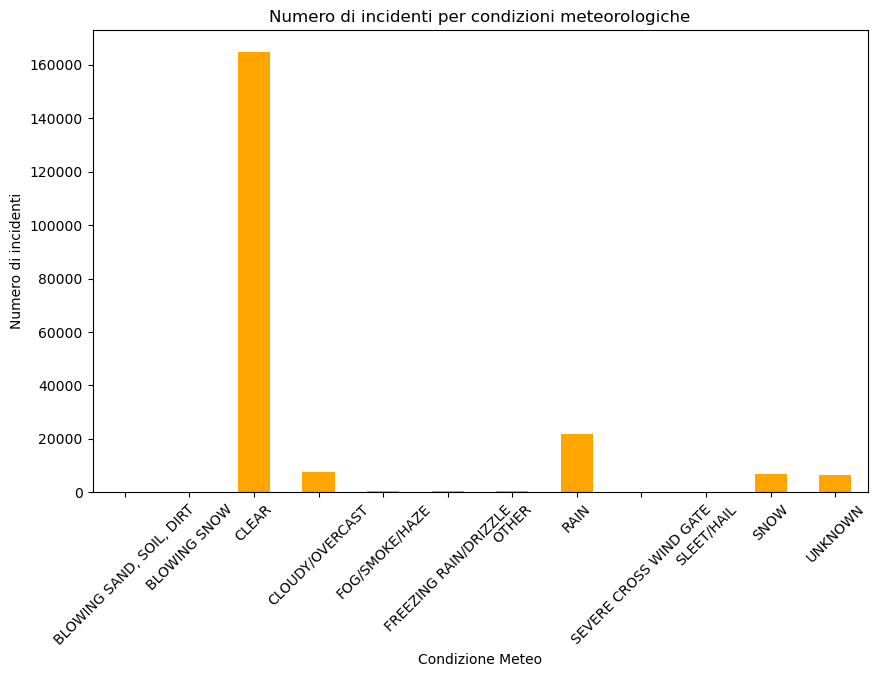

In [29]:
#2
plt.figure(figsize = (10, 6))
numIncidentiMeteo.plot(kind = 'bar', color = 'orange')
plt.title('Numero di incidenti per condizioni meteorologiche')
plt.xlabel('Condizione Meteo')
plt.ylabel('Numero di incidenti')
plt.xticks(rotation = 45)
plt.show()

In [47]:
#3
dimensione = dati['injuries_total'].groupby('first_crash_type').sum()
num = dati['first_crash_type'].value_counts()
plt.figure(figsize = (12, 8))
plt.scatter(num.index, num.values, s = dimensione.values, c = dimensione.values, alpha = 0.7, edgecolors = 'black')
plt.colorbar(label = 'Feriti Totali')
plt.title('Numero di feriti per tipo di incidente')
plt.xlabel('Tipo di Incidente')
plt.ylabel('Numero di Incidenti')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

KeyError: 'first_crash_type'

Motivazione della scelta dei grafici:
* Grafico 1 (bar chart): Una barra per ogni ora rende è più facile per confrontare le grandezze degli incidenti in momenti diversi della giornata.
* Grafico 2 (bar chart): Le barre mostrano in modo chiaro il numero di incidenti per ogni condizione meteo, rendendo espliciti ed evidenti quali le condizioni più rischiose.
* Grafico 3 (scatter plot): Le dimensioni e le posizioni dei punti evidenziano in modo esplicito e chiaro quanto siano gravi gli incidenti in base al tipo, quindi è utile per capire quali sono le categorie critiche.
